Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.



In [1]:
#Importing Necessary Modules
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Loading data 
data = pd.read_csv("BankNote_Authentication.csv")

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
print("The shape of data is {}".format(data.shape))

The shape of data is (1372, 5)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
#Checking for null value 
data.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
#Above result indicate  that there is no null value 

In [8]:
#checking the distribution of target column 
data["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

In [9]:
#Pre assuming 1 for geniuine 
# 0 for forged 

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


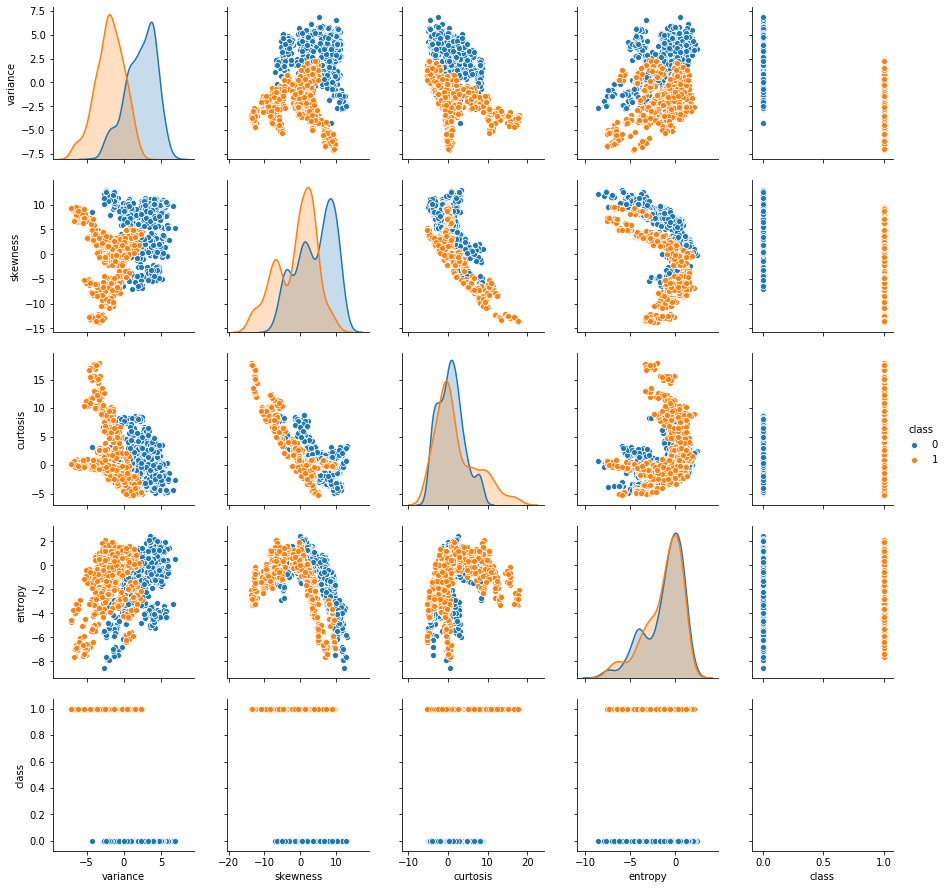

In [11]:
sns.pairplot(data,hue='class',diag_kind='kde')

In [12]:
#seperating the class column 
y = data["class"]

In [13]:
X = data.drop('class',axis=1)

In [14]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [15]:
#importing the train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 12,test_size=0.25)

In [16]:
X_train.shape

(1029, 4)

In [17]:
X_test.shape

(343, 4)

In [18]:
#applying random forest model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
rfcl.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
#Score on train and test
print("The score on train data {}".format(rfcl.score(X_train,y_train)))
print("The score on test data {}".format(rfcl.score(X_test,y_test)))

The score on train data 1.0
The score on test data 0.9941690962099126


In [20]:
y_pred = rfcl.predict(X_test)

In [21]:
#Printing classfication report 
from sklearn.metrics import classification_report
print("The classification report is \n",classification_report(y_test,y_pred))

The classification report is 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       192
           1       0.99      1.00      0.99       151

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [22]:
#using pickle concept to save the model
import pickle 
pickle_out = open("Classifier.pkl","wb")
pickle.dump(rfcl,pickle_out)
pickle_out.close()